In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import sympy as sp
import time
import random
import math

### **Question 1**

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**A.**
Let A be the (n, k) matrix, B be the (k, m) matrix and X be the matrix obtained by matrix multiplication of A and B. Then X will be of (n, m) order. The element $x_{ij}$ in the matrix X is calculated as:

$x_{ij} = \Sigma_{r=1}^{k} a_{ir} b_{rj}$

We perform dot product of the i-th row of A with the j-th column of B, which involves k multiplications. We sum up the results of these multiplications. This involves (k-1) additions. There are n rows and m columns in X, so we need to perform the above dot product operation for n * m times. So this means,
$$\text{No. of Multiplications} = k \times n \times m$$
and,
$$\text{No. of Additions} = (k-1) \times n \times m$$


### **Question 2**

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [39]:
A = np.random.rand(50, 50)
B = np.random.rand(50, 25)
def matrix_multiply_lol(A, B):
    n= len(A)
    k= len(A[0])
    m= len(B[0])
    X= [[0]*m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for r in range(k):
                X[i][j]+= A[i][r] * B[r][j]
    return X

def matrix_multiply_np(A, B):
    X = np.matmul(np.array(A), np.array(B))
    return X

start_time = time.time()
result_lol = matrix_multiply_lol(A.tolist(), B.tolist())
end_time = time.time()
print(f"Time for matrix_multiply using list of lists: {end_time-start_time:.4f} seconds")

start_time = time.time()
result_np = matrix_multiply_np(A, B)
end_time = time.time()
print(f"Time for matrix_multiply using numpy: {end_time-start_time:.4f} seconds")

Time for matrix_multiply using list of lists: 0.0125 seconds
Time for matrix_multiply using numpy: 0.0013 seconds


**We can clearly observe that NumPy approach is faster than list of lists approach.**
- This is because NumPy is coded and implemented in a faster programming languages like C or C++.
- It also involves efficient algorithms like parallel processing. This helps to carry out dot product at once rather than going element by element.
- NumPy arrays are more memory-efficient than Python lists because they store elements in contiguous memory blocks.

### **Question 3**

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**A.**
To pass over the entire array, it takes O(n) time complexity.So, to find the kth largest by using the above approach, it takes O(n x k) time complexity.
A better method would be finding the median using quick select function. As we know that median will be $(n//2 + 1)^{th}$ term or the average of $(n//2 + 1)^{th}$ and $(n//2)^{th}$ term, we can find the kth smallest term using quick select function where k is the term number. The worst case time complexity of quick select can be $O(n^2)$ but this situation can be reduced by taking a random pivot

In [40]:
arr= np.random.rand(1000)

###### **Median using method given in the question**

In [41]:
def find_kth_largest(nums, k):
    nums1= list(nums)
    for _ in range(k-1):
        nums1.remove(max(nums1))
    return max(nums1)
def median_iterations(nums):
    n= len(nums)
    if n%2== 1:
        return find_kth_largest(nums, (n//2)+1)
    else:
        return (find_kth_largest(nums, n//2) + find_kth_largest(nums, (n//2)+1))/2

###### **Median using quickselect method**

In [42]:
def partition(arr, l, r):
    pivot_index= random.randint(l, r)
    arr[pivot_index],arr[r]= arr[r],arr[pivot_index]
    x= arr[r]
    i= l
    for j in range(l, r):
        if arr[j]<= x:
            arr[i],arr[j]= arr[j],arr[i]
            i+= 1
    arr[i],arr[r]= arr[r],arr[i]
    return i

def kth_smallest(arr, l, r, k):
    if k> 0 and k<= r-l+1:
        index= partition(arr, l, r)
        if index-l== k-1:
            return arr[index]
        if index-l> k-1:
            return kth_smallest(arr, l, index-1, k)
        return kth_smallest(arr, index+1, r, k-index+l-1)

def median_quicksel(arr):
    n= len(arr)
    if n%2== 1:
        return kth_smallest(arr, 0, n-1, n//2 +1)
    return (kth_smallest(arr, 0, n-1, n//2+1) + kth_smallest(arr, 0, n-1, n//2))/2

###### **Median using NumPy**

In [43]:
def median_np(arr):
    return np.median(arr)

In [44]:
start_time= time.time()
result_lol= median_iterations(arr)
end_time= time.time()
print(f"Time for finding median using given method: {end_time-start_time:.4f} seconds")

start_time= time.time()
result_np= median_quicksel(arr)
end_time= time.time()
print(f"Time for finding median using quickselect: {end_time-start_time:.4f} seconds")

start_time= time.time()
result_np= median_np(arr)
end_time= time.time()
print(f"Time for finding median using numpy: {end_time - start_time:.4f} seconds")

Time for finding median using given method: 0.0285 seconds
Time for finding median using quickselect: 0.0029 seconds
Time for finding median using numpy: 0.0017 seconds


We can observe that finding median using numpy is way faster than the given approach and the quick select approach, but the quickselect approach is also faster than the given approach. The numpy approach obviously should be the fastest because of its runtime in C, vectorization algorithms, etc..

### **Question 4, 5 & 6**

What is the gradient of the following function with respect to x and y?
$$x^2y+y^3sinx$$

**A.**

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2y)}{\partial x} + \frac{\partial (y^3sinx)}{\partial x}$$

$$\frac{\partial f(x,y)}{\partial x} = y\frac{\partial (x^2)}{\partial x} + y^3\frac{\partial (sinx)}{\partial x}$$

$$\frac{\partial f(x,y)}{\partial x} = y(2x) + y^3(cosx)$$

$$\frac{\partial f(x,y)}{\partial x} = 2xy + y^3cosx$$

Therefore, the gradient of $x^2y+y^3sinx$ w.r.t x is $2xy + y^3cosx$

$$\frac{\partial f(x,y)}{\partial y} = \frac{\partial (x^2y)}{\partial y} + \frac{\partial (y^3sinx)}{\partial y}$$

$$\frac{\partial f(x,y)}{\partial y} = x^2\frac{\partial (y)}{\partial y} + sinx\frac{\partial (y^3)}{\partial y}$$

$$\frac{\partial f(x,y)}{\partial y} = x^2(1) + sinx(3y^2) $$

$$\frac{\partial f(x,y)}{\partial y} = x^2 + 3y^2sinx$$

Therefore, the gradient of $x^2y+y^3sinx$ w.r.t x is $x^2 + 3y^2sinx$

#### **Verification using JAX**

In [45]:
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
grad_f= jax.grad(f, (0, 1))
x_val= 2.5
y_val= 4.0
grad_jax = grad_f(x_val, y_val)

grad_manual = (2*x_val*y_val + y_val**3 * jnp.cos(x_val), x_val**2 + 3*y_val**2 * jnp.sin(x_val))
print(grad_manual)
print(grad_jax)

(Array(-31.27319, dtype=float32, weak_type=True), Array(34.97666, dtype=float32, weak_type=True))
(Array(-31.27319, dtype=float32, weak_type=True), Array(34.97666, dtype=float32, weak_type=True))


We can see that the values we got by analytical and by using jax are identical.

---



#### **Verification using sympy**

In [46]:
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
grad_f = [sp.diff(f, var) for var in (x, y)]
grad_f_func = [sp.lambdify((x, y), g) for g in grad_f]

x_val = 2.5
y_val = 4.0
grad_sympy = [g(x_val, y_val) for g in grad_f_func]

print(grad_manual)
print(grad_sympy)

(Array(-31.27319, dtype=float32, weak_type=True), Array(34.97666, dtype=float32, weak_type=True))
[-31.273191395003757, 34.976662916989916]


We can see that the values we got by analytical and by using sympy are identical.

#### **Question 7 & 8**



In [54]:
student_info= {
    2022: {
        'Branch 1': [
            {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}},
        ],
        'Branch 2': [
            # students for Branch 2 in 2022
        ],
    },
    2023: {
        'Branch 1': [
            # students for Branch 1 in 2023
        ],
        'Branch 2': [
            # students for Branch 2 in 2023
        ],
    },
    2024: {
        'Branch 1': [
            # students for Branch 1 in 2024
        ],
        'Branch 2': [
            # students for Branch 2 in 2024
        ],
    },
    2025: {
        'Branch 1': [
            # students for Branch 1 in 2025
        ],
        'Branch 2': [
            # students for Branch 2 in 2025
        ],
    },
}

print(student_info)

{2022: {'Branch 1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}], 'Branch 2': []}, 2023: {'Branch 1': [], 'Branch 2': []}, 2024: {'Branch 1': [], 'Branch 2': []}, 2025: {'Branch 1': [], 'Branch 2': []}}


In [48]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number= roll_number
        self.name= name
        self.marks= marks

class Branch:
    def __init__(self, name):
        self.name= name
        self.students= []

class Year:
    def __init__(self, year):
        self.year= year
        self.branches= {}

class Database:
    def __init__(self):
        self.years= {}

db = Database()

I was only able to write code for class method upto initialization as I am not familiar with classes.

### **Question 9**



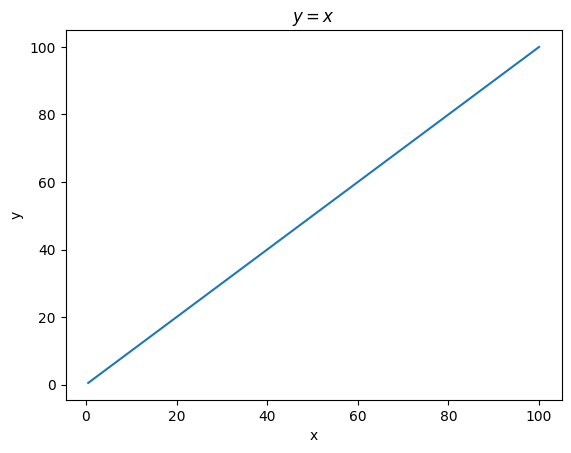

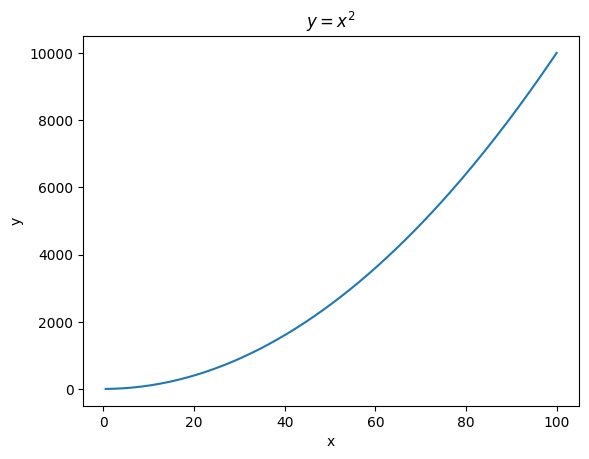

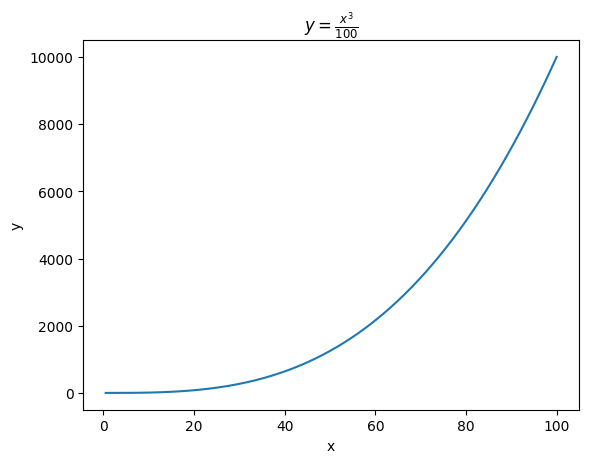

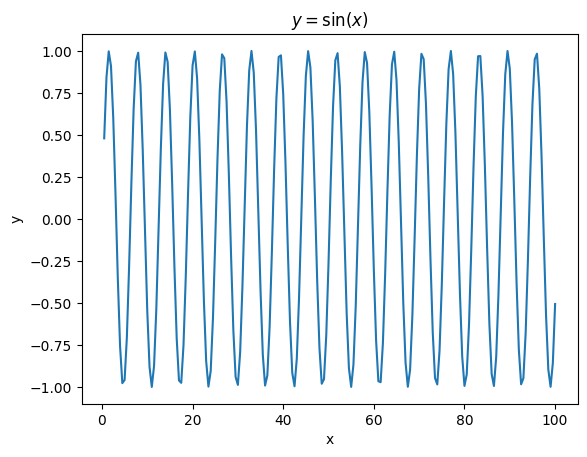

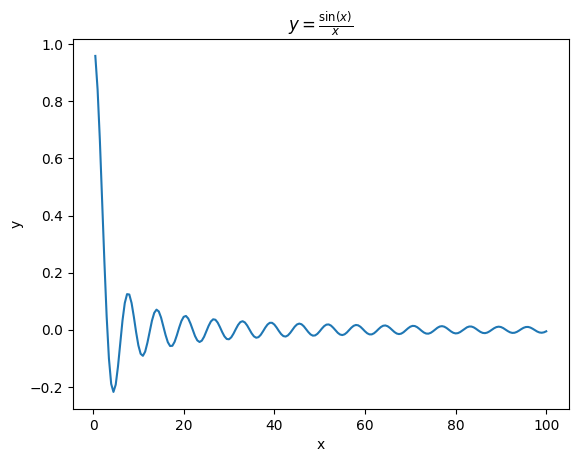

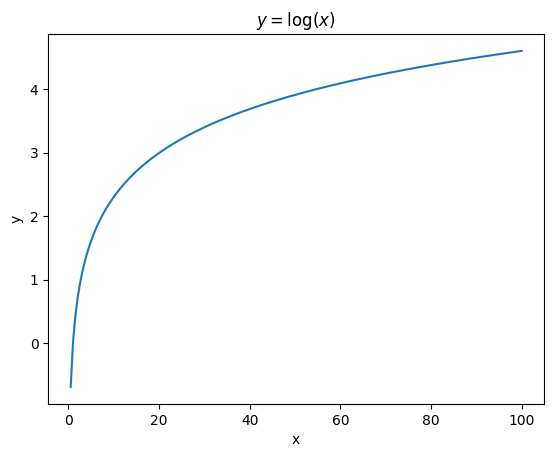

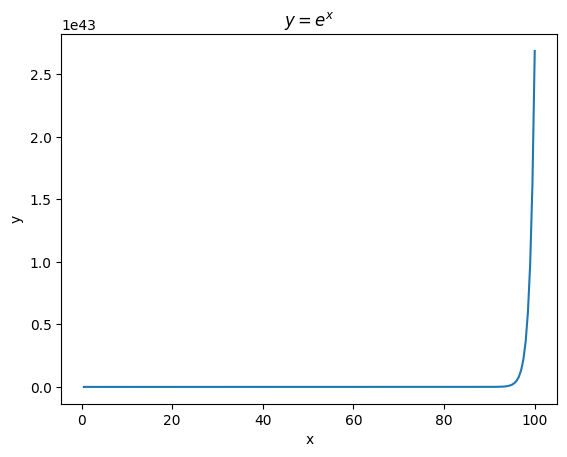

In [49]:
x= np.arange(0.5, 100.5, 0.5)
y1= [x,'$y = x$']
y2= [x**2, '$y = x^2$']
y3= [x**3 /100, '$y = \\frac{x^3}{100}$']
y4= [np.sin(x), '$y = \\sin(x)$']
y5= [np.sin(x)/x, '$y = \\frac{\\sin(x)}{x}$']
y6= [np.log(x), '$y = \\log(x)$']
y7= [np.exp(x), '$y = e^x$']
def matplot_plt(x,y):
  plt.plot(x,y[0])
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(y[1])
  plt.show()

matplot_plt(x, y1)
matplot_plt(x, y2)
matplot_plt(x, y3)
matplot_plt(x, y4)
matplot_plt(x, y5)
matplot_plt(x, y6)
matplot_plt(x, y7)

#### **Question 10 & 11**

In [50]:
random_matrix= np.random.uniform(1, 2, (20, 5))

df= pd.DataFrame(random_matrix, columns= ['a', 'b', 'c', 'd', 'e'])
std_devs_column= df.std()
highest_std_dev_column= std_devs_column.idxmax()

means_rows= df.mean(axis=1)
lowest_mean_row= means_rows.idxmin()

print(df)
print()
print(f"The column with the highest standard deviation is: {highest_std_dev_column}")
print(f"The row with the lowest mean is: {lowest_mean_row}")

           a         b         c         d         e
0   1.587146  1.601651  1.569004  1.675302  1.895007
1   1.741681  1.189065  1.586763  1.067809  1.599513
2   1.745010  1.340843  1.579678  1.574806  1.450392
3   1.897249  1.483013  1.009027  1.852806  1.495025
4   1.516818  1.267552  1.279410  1.346487  1.048409
5   1.732839  1.757920  1.258226  1.481310  1.291284
6   1.925065  1.366411  1.257582  1.759379  1.368674
7   1.160409  1.369473  1.870145  1.821681  1.580701
8   1.611442  1.879725  1.362780  1.699244  1.397059
9   1.592314  1.206192  1.304460  1.904161  1.547056
10  1.979744  1.347053  1.271877  1.183951  1.969734
11  1.341103  1.127674  1.264463  1.379969  1.429167
12  1.800162  1.590405  1.034376  1.311018  1.833255
13  1.297497  1.096820  1.558880  1.650830  1.926518
14  1.202434  1.684814  1.013668  1.226534  1.852885
15  1.714357  1.368816  1.135584  1.005241  1.356828
16  1.185665  1.583746  1.892143  1.287069  1.132217
17  1.812290  1.323497  1.980508  1.199707  1.

In [51]:
df['f']= df['a']+df['b']+df['c']+df['d']+df['e']
df['g']= ['LT8' if df['f'][i]<8 else 'GT8' for i in range(20)]
no_of_LT8= len(df[df['g']=='LT8'])
std_LT8= df[df['g']== 'LT8']['f'].std()
std_GT8= df[df['g']== 'GT8']['f'].std()

print(df)
print()
print("Number of rows where column 'g' is 'LT8':", no_of_LT8)
print("Standard deviation of column 'f' where column 'g' is 'LT8':", std_LT8)
print("Standard deviation of column 'f' where column 'g' is 'GT8':", std_GT8)

           a         b         c         d         e         f    g
0   1.587146  1.601651  1.569004  1.675302  1.895007  8.328109  GT8
1   1.741681  1.189065  1.586763  1.067809  1.599513  7.184831  LT8
2   1.745010  1.340843  1.579678  1.574806  1.450392  7.690728  LT8
3   1.897249  1.483013  1.009027  1.852806  1.495025  7.737121  LT8
4   1.516818  1.267552  1.279410  1.346487  1.048409  6.458676  LT8
5   1.732839  1.757920  1.258226  1.481310  1.291284  7.521579  LT8
6   1.925065  1.366411  1.257582  1.759379  1.368674  7.677110  LT8
7   1.160409  1.369473  1.870145  1.821681  1.580701  7.802410  LT8
8   1.611442  1.879725  1.362780  1.699244  1.397059  7.950250  LT8
9   1.592314  1.206192  1.304460  1.904161  1.547056  7.554182  LT8
10  1.979744  1.347053  1.271877  1.183951  1.969734  7.752360  LT8
11  1.341103  1.127674  1.264463  1.379969  1.429167  6.542377  LT8
12  1.800162  1.590405  1.034376  1.311018  1.833255  7.569216  LT8
13  1.297497  1.096820  1.558880  1.650830  1.92

#### **Question 12**

Write a small piece of code to explain broadcasting in numpy.

A.

The way NumPy handles arrays with various shapes during arithmetic operations is called as broadcasting. Numpy basically stretches the smaller size array to be compatible for the operation being performed with the larger array.

In [52]:
# Example
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

vector = np.array([10, 20, 30])

result = matrix + vector

print("Matrix:")
print(matrix)
print()
print("Vector:")
print(vector)
print()
print("Result after broadcasting and addition:")
print(result)


Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Vector:
[10 20 30]

Result after broadcasting and addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


###### **Explanation:**
*   The matrix has the shape (3, 3).
*   The vector has the shape (3,).

Broadcasting: When adding the vector to the matrix, NumPy broadcasts the vector to match the shape of the matrix. This means the vector is streched and replicated across each row of the matrix.

The vector [10, 20, 30] is added to each row of the matrix:

First row: [1+10, 2+20, 3+30]= [11, 22, 33]

Second row: [4+10, 5+20, 6+30]= [14, 25, 36]

Third row: [7+10, 8+20, 9+30]= [17, 28, 39]

### **Question 13**

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [53]:
def my_argmin(arr):
    min_v= arr[0]
    min_i= 0
    for i in range(1, len(arr)):
        if arr[i]< min_v:
            min_v= arr[i]
            min_i= i
    return min_i
#example
arr= np.array([5, 2, 8, 1, 9, 3])
print(my_argmin(arr))
print(np.argmin(arr))

3
3
